## Copyrights
1. textbook official repository: https://github.com/WegraLee/deep-learning-from-scratch
    * 아래 python code들은 [chapter 4](https://github.com/WegraLee/deep-learning-from-scratch/tree/master/ch04)에서 가져왔습니다.
1. fork source: https://github.com/ExcelsiorCJH/DLFromScratch [(chapter4)](https://nbviewer.org/github/ExcelsiorCJH/DLFromScratch/blob/master/Chap04-Neural_Network_Traing/Chap04-Neural_Network_Training.ipynb)
1. additional repository: https://github.com/SDRLurker/deep-learning [(4장)](https://nbviewer.org/github/SDRLurker/deep-learning/blob/master/4장.ipynb)

### Customized by Gil-Jin Jang

## 파일 설명

| 파일명 | 파일 용도 | 관련 절 | 페이지 |
|:--   |:--      |:--    |:--      |
| [Chap04-NN_Training.ipynb](Chap04-NN_Training.ipynb) | 내용 + 실행가능 코드 | 4.1-4.6 | 107-146 |
| [gradient_1d.py](https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch04/gradient_1d.py) | 수치 미분으로 기울기를 구합니다. | 4.3.2 수치 미분의 예 | 125 |
| [gradient_2d.py](https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch04/gradient_2d.py) | 수치 미분으로 기울기를 구합니다(두 편미분을 동시에 계산). | 4.4 기울기 | 129 |
| [gradient_method.py](https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch04/gradient_method.py) | 경사하강법의 갱신 과정을 보여줍니다. | 4.4.1 경사법(경사 하강법) | 132 |
| [gradient_simplenet.py](https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch04/gradient_simplenet.py) | simpleNet 클래스 | 4.4.2 신경망에서의 기울기 | 134 |
| [train_neuralnet.py](https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch04/train_neuralnet.py) | 미치배치 방식으로 학습하고 시험 데이터로 평가합니다. | 4.5.2 미니배치 학습 구현하기 / 4.5.3 시험 데이터로 평가하기 | 141, 143 |
| [two_layer_net.py](https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch04/two_layer_net.py) | 2층 신경망 클래스 | 4.5.1 2층 신경망 클래스 구현하기 | 137 |

## 출처

이미지 출처 1: overfitting https://medium.com/greyatom/what-is-underfitting-and-overfitting-in-machine-learning-and-how-to-deal-with-it-6803a989c76

# Chap04 - 신경망 학습

> 이번 장에서는 신경망 학습(training)에 대해 알아보자. **학습**이란 학습 데이터로부터 가중치 매개변수의 최적값을 자동으로 찾는것을 말한다. 또한, 이번 장에서는 신경망이 학습할 수 있도록 하는 **지표**에 해당하는 *손실함수* 에 대해 알아보자.

## 목차
```
4.1 데이터에서 학습한다! 
__4.1.1 데이터 주도 학습 
__4.1.2 훈련 데이터와 시험 데이터 
4.2 손실 함수 
__4.2.1 평균 제곱 오차 
__4.2.2 교차 엔트로피 오차 
__4.2.3 미니배치 학습 
__4.2.4 (배치용) 교차 엔트로피 오차 구현하기 
__4.2.5 왜 손실 함수를 설정하는가? 
4.3 수치 미분 
__4.3.1 미분 
__4.3.2 수치 미분의 예 
__4.3.3 편미분 
4.4 기울기 
__4.4.1 경사법(경사 하강법) 
__4.4.2 신경망에서의 기울기 
4.5 학습 알고리즘 구현하기 
__4.5.1 2층 신경망 클래스 구현하기
__4.5.2 미니배치 학습 구현하기 
__4.5.3 시험 데이터로 평가하기
```

## 4.1 데이터에서 학습한다!

### 4.1.1 데이터 주도 학습

사람이 해결하는 방법은 경험과 직관을 단서로 시행착오를 거듭하며 일을 진행한다. 
하지만 실제 문제는 매우 복잡하다. 다음 그림과 같이 사람마다 필체가 매우 다르기 때문에 
`5`를 제대로 분류하는 프로그램을 직접 고안하고 설계하기는 의외로 매우 어렵다. 

|![그림 4.1](./images/4-1.png)|
|:--:| 
|__그림 4.1__ 손글씨 숫자 `5`의 예: 사람마다 자신만의 필체가 있다.|

`5`를 주어진 데이터와 전문가의 경험을 활용하여 해결하는 방법은, 전문가의 의해 정의된 방법에 의해 
이미지로부터 **특징(feature)**을 추출하고, 그 특징의 패턴을 SVM, KNN 등의 기계학습 기술로 학습하는 방법이다. 
컴퓨터 비전 분야세서는 SIFT, SURF, HOG 등 많은 방법들이 제안되어 있다. 

---

하지만 이미지를 벡터로 변환할 때 사용하는 특징은 여전히 ***사람***이 설계하기 때문에, 
문제에 적합한 특징을 쓰지 않으면 좋은 결과를 얻을 수 없다. 
따라서, 기계학습에서는 사람의 개입을 최소화하고 수집한 데이터로부터 패턴을 자동으로 찾으려고 노력한다. 

|![그림 4.2](./images/4-2.png)|
|:--:| 
|__그림 4.2__ 규칙을 `사람`이 만드는 방식에서 `기계`가 데이터로부터 배우는 방식으로의 패러다임 전환: 회색 블록은 사람이 개입하지 않음을 뜻한다.|

> 딥러닝을 **종단간 기계학습(end-to-end machine learning)**이라고도 한다. 종단간은 ‘처음부터 끝까지’라는 의미로, 데이터(입력)에서 목표한 결과(출력)를 얻는다는 뜻을 담고 있다.

### 4.1.2 훈련 데이터와 시험 데이터

머신러닝과 딥러닝에서는 데이터를 **훈련 데이터(training data)**와 **시험 데이터(test data)**로 나눠 학습과 테스트를 진행하는 것이 일반적이다. 보통 전체 데이터에서 훈련 데이터와 시험 데이터의 비율은 `6:4`, `7:3`, 또는 `8:2` 로 나눈다.

<img src="./images/train-test.png" width="70%" height="70%" />

먼저, 훈련 데이터만 사용하여 학습하면서 최적의 매개변수(가중치, 편향)를 찾는다. 그런 다음 시험 데이터를 이용하여 훈련된 모델의 성능을 평가한다. 이렇게 데이터를 나누는 이유는 범용성(일반화, generalization)을 위함이다. 만약, 데이터를 나누지 않고 전체 데이터를 가지고 학습을 한다면 이 모델은 학습한 데이터 셋에만 지나치게 최적화되어 새로운 데이터에 대한 성능은 떨어지게 된다. 이러한 문제를 **오버피팅(overfitting)**이라 한다. (그림 출처: [링크](https://medium.com/greyatom/what-is-underfitting-and-overfitting-in-machine-learning-and-how-to-deal-with-it-6803a989c76) 참고)

![](./images/overfitting.png)


## 4.2 손실 함수

> loss function == error function == cost function

신경망 학습에서는 현재의 상태를 '하나의 **지표**'로 표현한다. 이러한 지표를 가장 좋게 만들어주는 가중치 매개변수의 값을 탐색하는 것이 신경망 학습이다. 신경망에서 사용하는 지표를 **손실함수(Loss/Cost function)**라고 한다. 손실함수는 실제와 이론을 모두 고려해 가장 적절한 함수를 선택하며, 보통 평균제곱오차(MSE, mean squared error)와 교차 엔트로피 오차(CEE, cross entropy error)를 많이 사용한다.

### 4.2.1 평균제곱오차 MSE

가장 많이 쓰이는 손실함수는 **평균제곱오차(MSE, Mean Squared Error)**다. MSE의 수식은 다음과 같다.

$$
E = \frac{1}{2} \sum_{k}{\left( y_k - t_k \right)}^{2}
$$

- $y_k$ : 신경망 모델이 추정한 값
- $t_k$ : 정답 레이블 또는 데이터

위의 MSE 함수를 NumPy를 이용해 구현하면 다음과 같다.

In [1]:
import numpy as np

In [2]:
# MSE 함수 구현
def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t)**2)

In [3]:
# 정답은 '2' -> one-hot
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# ex1) : '2'일 확률이 가장 높다고 추정함(0.6) -> softmax 결과값
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print('MSE of ex1 = %.10f' % mean_squared_error(np.array(y), np.array(t)))

# ex2) : '7'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print('MSE of ex2 = %.10f' % mean_squared_error(np.array(y), np.array(t)))

MSE of ex1 = 0.0975000000
MSE of ex2 = 0.5975000000


## 4.2 교차 엔트로피 오차 CEE

또 다른 손실 함수로서 **교차 엔트로피 오차(CEE, Cross Entropy Error)**도 자주 사용한다. CEE의 수식은 다음과 같다.

$$
E = - \sum_{k}{t_k \log{y_k}}
$$

- $\log$ : 밑이 $e$인 자연로그($\log_{e}$)
- $y_k$ : 신경망 모델의 출력
- $t_k$ : 정답 레이블

> 참고: Entropy in information theory
$$ H(x) = E[-\log x] = \int -p(x) \log x  dx $$

$t_k$는 정답에 해당하는 인덱스의 원소만 `1`이고 나머지는 `0`이다(원-핫 인코딩). 따라서, 위의 식처럼 실제로 정답일 때의 추정($t_k = 1$일 때의 $y_k$)의 계산만 하면 된다.

<img src="./images/4-3.png" width="50%" height="50%"/>

NumPy를 이용해서 교차엔트로피를 구현해보자.

In [4]:
def cross_entropy_error(y, t):
    delta = 1e-7  # log0 방지를 위함
    return -np.sum(t * np.log(y + delta))

In [5]:
# 정답은 '2' -> one-hot
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# ex1) : '2'일 확률이 가장 높다고 추정함(0.6) -> softmax 결과값
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print('MSE of ex1 = %.10f' % cross_entropy_error(np.array(y), np.array(t)))

# ex2) : '7'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print('MSE of ex2 = %.10f' % cross_entropy_error(np.array(y), np.array(t)))

MSE of ex1 = 0.5108254571
MSE of ex2 = 2.3025840930


### 4.2.3 미니배치 학습

딥러닝은 훈련 데이터를 이용해 학습하면서, 훈련 데이터에 대한 손실함수의 값을 구하고 그 값을 **최소**로하는 매개변수(가중치, 편향)를 찾아내는 것이다. 이를 위해서는 모든 훈련 데이터를 대상으로 손실함수 값을 구해야 한다. 보통 딥러닝은 미니배치(Mini-batch) 학습을 하기때문에 미니배치 크기만큼의 데이터에 대한 각각의 손실함수를 구해 평균을 내어 **'평균 손실 함수'**를 계산한다. 

$$
E = - \frac{1}{N_i}\sum_{i}{\sum_{k \in B_i}{t_{k}\log{y_{k}}}}
$$

- $i$: 미니배치 인덱스
- $N$: 미니배치 크기. 예: 10, 30, 100, ...
- $t_{k} \in \{0, 1\}$: $k$번째 데이터의 정답(target)
- $y_{k} \in \mathcal{R}, 0 \leq y_{k} \leq 1$: $k$번째 입력을 이용한 추청값

딥러닝에서는 훈련 데이터로부터 미니배치(mini-batch)만큼 일부만 추출하여 학습을 하고, 미니배치의 평균 손실함수를 전체 훈련 데이터의 **'근사치'**로 이용한다. 이러한 학습방법을 **미니배치 학습**이라 한다.

Batch data 추출을 위해서 지정한 범위의 수 중에서 무작위로 원하는 개수만 꺼낼 수 있는 `np.random.choice()` 함수를 사용한다. 

In [6]:
# 10개의 데이터를 5번 무작위로 추출하고 index를 비교하여 본다 
# NOTE: 중복 선택 가능하다. 
for i in range(5):
    print(np.random.choice(30,10))

[25  0 11 25 16 22 12 11  8  0]
[ 4 17 26 10 27  2 12 25 27 14]
[ 6 25 22 13  3 11  8 16  1  3]
[ 3  2 16 20  8  7 21 21 25 13]
[23 25 25  0 10  4  2  4  8 25]


아래의 코드는 MNIST 데이터셋에서 미니배치 만큼 데이터를 무작위로 가져오는 것을 구현한 코드이다.

In [7]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
# sys.path.append('..')  # 위와 같다
import numpy as np
from dataset.mnist import load_mnist

In [8]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print('x_train.shape :', x_train.shape)
print('t_train.shape :', t_train.shape)
print('x_test.shape :', x_test.shape)
print('t_test.shape :', t_test.shape)
print('t_test[0] =',t_test[0])
with np.printoptions(precision=2, suppress=True):
    print(x_test[0][::4])

x_train.shape : (60000, 784)
t_train.shape : (60000, 10)
x_test.shape : (10000, 784)
t_test.shape : (10000, 10)
t_test[0] = [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.62 0.   0.   0.   0.
 0.   0.   1.   0.78 0.78 0.67 0.   0.   0.   0.28 1.   1.   1.   0.
 0.   0.   0.   0.26 0.26 1.   0.   0.   0.   0.   0.   0.   0.82 0.
 0.   0.   0.   0.   0.   0.33 0.   0.   0.   0.   0.   0.   0.17 0.
 0.   0.   0.   0.   0.23 0.   0.   0.   0.   0.   0.   0.52 0.   0.
 0.   0.   0.   0.   0.8  0.   0.   0.   0.   0.   0.   1.   0.   0.
 0.   0.   0.   0.   0.94 0.   0.   0.   0.   0.   0.   0.65 0.   0.
 0.   0.   0.   0.01 0.14 0.   0.   0.   0.   0.   0.15 0.   0.   0.
 0.   0.   0.   0.88 0.   0.   0.   0.   0.   0.   1.   0.   0.   0.
 0.   0.   0.   

In [9]:
train_size = x_train.shape[0]
batch_size = 10
# 0~59999 에서 batch_size만큼 random 추출
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

print('batch_mask :', batch_mask)
print('x_batch.shape :', x_batch.shape)
print('t_batch.shape :', t_batch.shape)

batch_mask : [ 5690 10407 11082  1688  3769 26106 59994 57948   294 36783]
x_batch.shape : (10, 784)
t_batch.shape : (10, 10)


### 4.2.4 (배치용) 교차 엔트로피 오차 구현하기



In [10]:
# mini-batch CEE
def cross_entropy_error(y, t):
    if y.ndim == 1:   # vector y.shape = (20,)
        t = t.reshape(1, t.size)  # (1,20)
        y = y.reshape(1, y.size)  # (1,20)
        
    batch_size = y.shape[0]   # number of samples in a batch
    return -np.sum(t * np.log(y), axis=0) / batch_size

정답 레이블이 원-핫 인코딩이 아니라 '2'나 '7' 등의 숫자 레이블로 주어졌들 때의 교차 엔트로피 오차를 다음과 같이 구할 수 있다.

In [11]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    # y: N x C     [0.1 0.1 0.6 0.1 0.1 .....]
    # t: N x 1, N  [2] --> [0 0 1 0 ....]
    # t*log(y) = 0*0.1+0*0.1+1*0.6+... = 1*0.6

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

### 4.2.5 왜 손실 함수를 설정하는가?


왜 직접적인 **정확도**를 쓰지 않고 **손실 함수의 값**을 쓰는가? 
* 정확도를 지표로 하면 매개변의 미분이 대부분 0이 되기 때문이다. 

신경망 학습의 지표를 손실함수가 아닌 정확도로 설정할 경우 정확도는 33%, 34% 처럼 연속적인 값이 아닌, 불연속적인 값으로 변하기 때문에 '미분'이 가능하지 않다. 활성화 함수로 계단함수를 사용하지 않는 이유 또한, 값이 불연속적이기 때문이다. 
따라서, 손실함수를 정의할 때는 미분값이 (이론적으로는) `0`이 되지 않는 sigmoid 함수와 softmax 함수 등이 사용된다. 

|![그림 4.4](./images/4-4.png)|
|:--:| 
|__그림 4.4__ step function and sigmoid function: 계단 함수는 대부분 기울기가 `0`이지만, 시그모이드 함수의 기울기(접선)는 `0`이 아니다. |

## 4.3 수치 미분

우리가 함수의 수학식을 정확히 알고 있으면 미분 공식을 이용하여 정확한 미분값(경사)를 알 수 있지만, 함수의 출력만 알고 있다면 극한의 정의에 따라 수치 미분을 수행할 수 있다.

### 4.3.1 미분의 정의

미분은 순간 변화의 정도를 나타낸 것이며, 수식은 다음과 같다.

$$
\frac{df(x)}{dx} = \lim_{h \rightarrow 0}{\frac{f(x+h)-f(x-h)}{2h}}
$$

불연속 함수의 경우 양의 방향에서만 극한값을 구할 수 있다.
$$
\frac{df(x)}{dx} = \lim_{h \rightarrow 0}{\frac{f(x+h)-f(x)}{h}}
$$
마찬가지로 음의 방향에서만 극한값을 구할 수 있다.
$$
\frac{df(x)}{dx} = \lim_{h \rightarrow 0}{\frac{f(x)-f(x-h)}{h}}
$$

In [12]:
def numerical_diff(f, x, h = 1e-4):
    return (f(x+h) - f(x-h)) / (2*h)

|![그림 4.5](./images/4-5.png)|
|:--:| 
|__그림 4.5__ **해석적(analytic)** 미분과 **수치(numerical)** 미분(근사로 구한 접선)의 비교 |

> **수치(numerical)** 미분은 아주 작은 차분으로 기울기를 구하는 것이며, 수식을 전개해 미분하는 것을 **해석적(analytic)** 미분, 또는 **해석적 해(anlytic solution)**을 구한다고 표한한다. 

> 예를 들어 $y = x^2$의 미분은 해석적으로는 $\frac{dy}{dx} = 2x$ 로 풀 수 있으며, $x=2$ 일때 y의 미분값은 `4`가 된다. 

> 이에 대한 수치 미분은 $h$의 값에 따라 차이가 있다.
$$ \left.\frac{dy}{dx}\right|_{x=x_0, h} = \frac{f(x_0+h)^2 - f(x_0-h)^2}{2h} $$

In [13]:
def f_(x): return x**2
print(numerical_diff(f=f_, x=2.0, h=0.0001))
print(numerical_diff(f=f_, x=2.0, h=0.001))
print(numerical_diff(f=f_, x=2.0, h=0.01))
print(numerical_diff(f=f_, x=2.0, h=0.1))

4.000000000004
3.9999999999995595
3.999999999999937
4.000000000000001


### 4.3.2 수치 미분의 예

아래의 함수를 미분해보고 접선을 그려 본다.

$$
y = 0.01x^{2} + 0.1x
$$

In [14]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

이 함수를 그린다

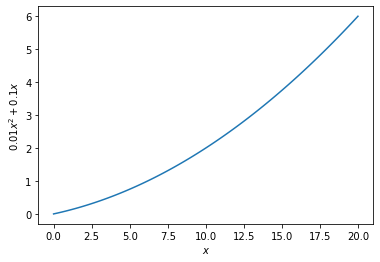

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,20,101)
plt.plot(x,function_1(x))
plt.xlabel('$x$'); plt.ylabel('$0.01x^{2} + 0.1x$')
plt.show()

In [16]:
# x = 5, 10 에서의 미분을 계산해 본다
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


In [17]:
# 접선을 그리는 함수를 생성하는 함수
def tangent_line(f, x):
    d = numerical_diff(f, x)
    y = f(x) - d*x
    return lambda t: d*t + y

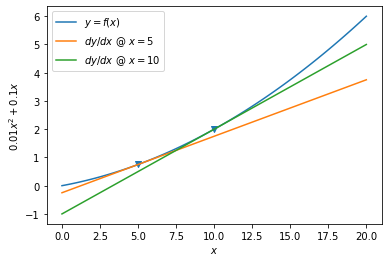

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

x = np.linspace(0,20,101)
tline5 = tangent_line(function_1, 5)
tline10 = tangent_line(function_1, 10)

plt.plot(x,function_1(x))
plt.plot(x,tline5(x))
plt.plot(x,tline10(x))
xc=np.array([5,10])
plt.scatter(xc,function_1(xc),marker='v')
plt.xlabel('$x$'); plt.ylabel('$0.01x^{2} + 0.1x$')
plt.legend(['$y=f(x)$', '$dy/dx \ @ \ {x=5}$', '$dy/dx \ @ \ {x=10}$'])
#plt.legend(['$y=f(x)$', '$\left.\frac{dy}{dx}\right|_{x=5}$', '$\left.\frac{dy}{dx}\right|_{x=10}$'])
plt.show()

### 4.3.3 편미분

변수가 2개인 다음의 함수를 고려한다. 

$$
f(x_0, x_1) = x_{0}^{2} + x_{1}^{2}
$$

|![그림 4.8](./images/4-8.png)|
|:--:| 
|__그림 4.8__ $f(x_0, x_1) = x_{0}^{2} + x_{1}^{2}$ 의 그래프

In [19]:
def function_2(x):
    return np.sum(x**2)   # or x[0]**2 + x[2]**2

변수가 2개이므로 이 함수를 미분하기 위하여 나머지 변수는 상수라고 가정하고 하나의 변수에 대해서만 미분을 취한다. 
이를 `**편미분**`이라고 한다.

$$
\frac{\partial f}{\partial x_0} = 2x_0, \quad \frac{\partial f}{\partial x_1} = 2x_1
$$
$$
x_0 = 3, \ x_1 = 4 \quad \Rightarrow \quad \frac{\partial f}{\partial x_0} = 6, \quad \frac{\partial f}{\partial x_1} = 8
$$
$x_0 = 3$, $x_1 = 4$ 의 편미분 값을 구하는 것을 수치미분으로 구현하면 다음과 같다.

In [20]:
# def f2_x0(x0): return x0*x0 + 2.0*4.0 
# def f2_x1(x1): return 2.0*3.0 + x1*x1
def f2_x0(x0): return function_2(np.array([x0, 4]))
def f2_x1(x1): return function_2(np.array([3, x1]))
print('df2/dx0(x0=3) =', numerical_diff(f2_x0,3.0))
print('df2/dx1(x1=4) =', numerical_diff(f2_x1,4.0))

df2/dx0(x0=3) = 6.00000000000378
df2/dx1(x1=4) = 7.999999999999119


## 4.4 기울기

위에서 편미분을 계산할 때, $x_0$와 $x_1$을 따로 계산했다. 이번에는 $(x_0, x_1)$ 양쪽의 편미분을 묶어서 $\left( \frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1} \right)$ 계산해보자. 이때, $\left( \frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1} \right)$ 와 같이 모든 변수의 편미분을 벡터로 나타낸 것을 **기울기 벡터**(gradient vector)라고 한다. 

In [21]:
def _numerical_gradient_no_batch(f, x):
    # f: method (function), x: (p,) vector
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        x0 = x[idx]
        
        # f(x+h) 계산
        x[idx] = x0 + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = x0 - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = x0 # 값 복원
        
    return grad  # size (p,) vector


def numerical_gradient(f, X):  # X: vector or matrix
    if X.ndim == 1:   # vector
        return _numerical_gradient_no_batch(f, X)
    else:   # matrix of size N x p
        grad = np.zeros_like(X)        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)        
        return grad

In [22]:
def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)  # (1,) scalar
    else:   # x is of size (N,p)
        return np.sum(x**2, axis=1)  # (N,)

def tangent_line(f, x):
    d = numerical_gradient(f, x)
    y = f(x) - d*x
    return lambda t: d*t + y

In [23]:
print(numerical_gradient(function_2, np.array((3.0, 4.0))))
print(numerical_gradient(function_2, np.array((0.0, 2.0))))
print(numerical_gradient(function_2, np.array((3.0, 0.0))))
print()

# much higher precision to show the numerical gradient error
with np.printoptions(precision=20, suppress=True):
    for x in [(3.0, 4.0), (0.0, 2.0), (3.0, 0.0)]:
        print(numerical_gradient(function_2, np.array(x)))        

[6. 8.]
[0. 4.]
[6. 0.]

[6.00000000000378  7.999999999999119]
[0.             4.000000000004]
[6.000000000012662 0.               ]


이제 아래로 볼록한 2차식 $f(x_0, x_1) = x_{0}^{2} + x_{1}^{2}$ 의 gradient를 2차원 그래프로 그려 보자.
코드는 [gradient_2d.py](https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch04/gradient_2d.py)를 참고하였다.

<img src="./images/4-8.png" width='50%'>

No handles with labels found to put in legend.


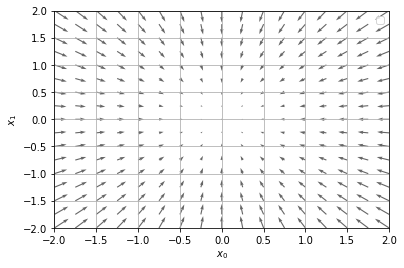

In [24]:
# source: gradient_2d.py at 
# https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch04/gradient_2d.py
%matplotlib inline
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)

X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient(function_2, np.array([X, Y]) )

plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.grid()
plt.legend()
plt.draw()
plt.show()

### 4.4.1 경사 하강법

일반적인 문제의 손실 함수는 매우 복잡하고 매개변수 공간이 광대하여 최적의 값을 찾기 매우 어렵다.
이런 상황에서 기울기는 최적값을 찾기 위한 유일한 단서이지만, 
실제로 복잡한 함수에서는 기울기가 가리키는 방향에 최소값이 없는 경우가 대부분이다. 

> 함수가 **최소값**, **최대값**, 또는 ***saddle point***에서는 기울기가 0이다. 또한 함수가 넓은 영역에서 미분값 0을 가질 수 있으며 이러한 곳을 ***plateau***라고 한다. 

기울어진 방향이 꼭 최소값/최대값을 가리키는 것은 아니지만, 그 방향으로 가야 함수의 값을 줄일 수 있다. 그래서 기울기 정보를 단서로 학습할 방향을 정해야 한다. 

딥러닝 학습에서 최적의 매개변수(가중치, 편향) 즉, 손실함수가 최소가 되게 하는 매개변수를 찾기 위해 **경사 하강법(Gradient descent)**를 사용한다. 

> 경사법은 최소값을 찾을 경우에는 **경사 하강법(gradient descent)**, 최대값을 찾을 때에는 **경사 상승법(gradient ascent)** 라고 한다. 하지만 부호를 반전시키면 동일하기 때문에 본질적으로는 중요하지 않다.

$$
x_0 = x_0 - \eta \frac{\partial f}{\partial x_0}
$$

$$
x_1 = x_1 - \eta \frac{\partial f}{\partial x_1}
$$

$\eta$는 업데이트하는 양을 나타내며, **학습률(learning rate)**라고 한다.

> 학습률 같은 매개변수를 하이퍼파라미터(hyper parameter)라고 한다. 하이퍼파라미터는 사람이 직접 설정해야 하는 매개변수다.

In [25]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )
        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

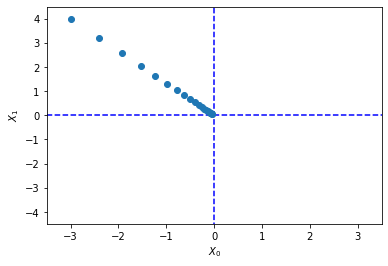

l=0.10, x*=(-0.035,0.046)  4.00 3.20 ... 0.07 0.06 


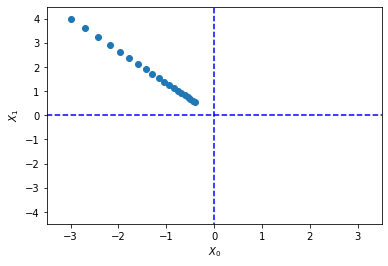

l=0.05, x*=(-0.365,0.486)  4.00 3.60 ... 0.60 0.54 


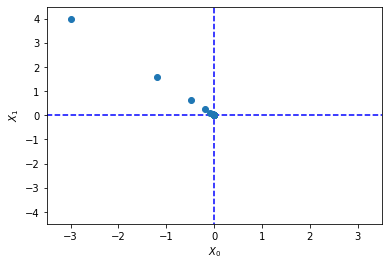

l=0.30, x*=(-0.000,0.000)  4.00 1.60 ... 0.00 0.00 


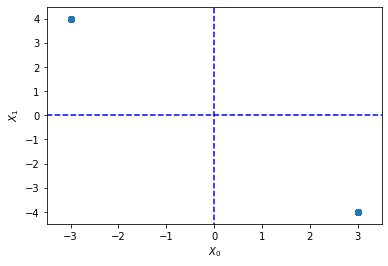

l=1.00, x*=(-3.000,4.000)  4.00 -4.00 ... 4.00 -4.00 


In [26]:
%matplotlib inline
def gd_plot(f, lr, step_num):
    init_x = np.array([-3.0, 4.0])    
    x, x_history = gradient_descent(f, init_x, lr=lr, step_num=step_num)
    plt.plot( [-5, 5], [0,0], '--b')
    plt.plot( [0,0], [-5, 5], '--b')
    plt.plot(x_history[:,0], x_history[:,1], 'o')
    plt.xlim(-3.5, 3.5)
    plt.ylim(-4.5, 4.5)
    plt.xlabel("$X_0$")
    plt.ylabel("$X_1$")
    plt.show()
    return x, x_history
  
step_num = 20
L = [0.1, 0.05, 0.3, 1.0]
for lr in L:
    x, xh = gd_plot(function_2, lr, step_num)
    print('l=%.2f, x*=(%.3f,%.3f)  %.2f %.2f ... %.2f %.2f ' % (lr, x[0], x[1], xh[0,1], xh[1,1], xh[-2,1], xh[-1,1]))

### 4.4.2 신경망에서의 기울기

가중치 매개변수에 대한 손실 함수의 기울기(***gradient***)를 구한다. 
기울기의 차원은 매개변수의 차원과 같다.

$$
\mathrm{W} = \begin{bmatrix} w_{11} & w_{21}  & w_{31} \\ w_{12} & w_{22} & w_{32} \end{bmatrix}, \quad
\frac{\partial L}{\partial \mathrm{W}} = \begin{bmatrix} \frac { \partial L }{ \partial w_{ 11 } }  & \frac { \partial L }{ \partial w_{ 21 } } & \frac { \partial L }{ \partial w_{ 31 } }  \\ \frac { \partial L }{ \partial w_{ 12 } }  & \frac { \partial L }{ \partial w_{ 22 } } & \frac { \partial L }{ \partial w_{ 32 } }  \end{bmatrix}
$$

In [27]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

'''
// equivalent C++ class
class SimpleNet {
    double **W;
    ...
    
    SimpleNet() { }
    ~SimpleNet() {}
    double predict(double *x) { ... }
}
'''

class simpleNet:
    #W = None   # not declaration, but initialization
    def __init__(self):  # constructor, self 
        self.W = np.random.randn(2, 3)  # 정규분포로 초기화
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        return cross_entropy_error(softmax(self.predict(x)),t)
        '''
        # longer lines
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss
        '''        

In [28]:
net = simpleNet()
print(net.W)

[[-0.11934016 -0.04478759  0.54739128]
 [ 0.37816204  1.25687002  0.11430894]]


In [29]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p, np.argmax(p))

t = t = np.array([0, 0, 1])
print(net.loss(x,t))

[0.26874174 1.10431047 0.43131282] 1
1.3376445326119517


In [30]:
def f(w): return net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.13384913  0.30867286 -0.44252199]
 [ 0.2007737   0.46300929 -0.66378299]]


In [31]:
# 좀더 간단하게 정의
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.13384913  0.30867286 -0.44252199]
 [ 0.2007737   0.46300929 -0.66378299]]


## 4.5 학습 알고리즘 구현하기

1. **미니배치**: 훈련 데이터 중 일부를 무작위로 가져옴
2. **기울기 산출**: 미니배치의 손실함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다.
3. **매개변수 갱신**: 학습률 만큼 매개변수를 갱신한다(`Gradient Descent`).
4. 1 ~ 3 단계 반복해준다.

### 4.5.1 2층 신경망 클래스 구현하기 

코드는 [two_layer_net.py](https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch04/two_layer_net.py)를 참고하였다.

<center> __표 4.1__ TwoLayerLet 클래스의 내부 변수 </center>

|변수|설명|
|:------------:|:-------------| 
|params|신경망의 매개변수를 보관하는 dictionary variable|
||`params['W1']`, `params['b1']`은 layer 1의 가중치와 bias|
||`params['W2']`, `params['b2']`은 layer 2의 가중치와 bias|
|grads|`gradient()`를 이용해 계산한 기울기를 보관하는 dictionary variable|
||`grads['W1']`, `grads['b1']`은 layer 1의 가중치의 기울기와 bias의 기울기|
||`grads['W2']`, `grads['b2']`은 layer 2의 가중치의 기울기와 bias의 기울기|

<center> __표 4.2__ TwoLayerLet 클래스의 함수들 </center>

|함수|설명|
|:------------|:-------------| 
|`__init__(self, input_size, `|초기화. 인수는 입력 크기, |
|`hidden_size, output_size, `|은닉층의 뉴런 수, 출력층의 뉴런 수, |
|`weight_init_std, `|정규분포 초기화 표준편차, |
|`grad_comp_mode`| 미분 계산 방법(`numerical/analytical`)|
|`predict(self, x)`|영상 입력 `x`에 대한 예측(추론)|
|`loss(self, x, t)`|손실 함수의 값을 구한다.|
|`accuracy(self, x, t)`|주어진 정답을 이용하여 정확도를 구한다.|
|`gradient(self, x, t)`|가중치 매개변수의 기울기를 구한다.|
|`_numerical_gradient(self, x, t)`|(hidden) numerical gradient|
|`_analytical_gradient(self, x, t)`|(hidden) analytical gradient|

In [32]:
# source: two_layer_net.py at 
# https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch04/two_layer_net.py
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

# 기존의 TwoLayerNet을 수정하여 numerical/analytical gradient를 선택할 수 있게 하였다.
# 생성변수 grad_comp_mode 가 'analytical' 이면 analytical_gradient 함수를 사용하고
# 'numerical' 이면 numerical_gradient 함수를 사용한다.
# 참고: analytical_gradient가 훨씬 빠르다

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01, \
                 grad_comp_mode='analytical'):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
        # gradient computation mode setting
        if grad_comp_mode == 'analytical':
            self.gradient = self._analytical_gradient
        elif grad_comp_mode == 'numerical':
            self.gradient = self._numerical_gradient       
        else:
            print('unknown grad_comp_mode ', grad_comp_mode, 'using analytical_gradient')
            self.gradient = self._analytical_gradient
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        return y
    
    # x: 입력 데이터, t: 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)       # softmax y (N,c)
        y = np.argmax(y, axis=1)  # int (N,1)
        t = np.argmax(t, axis=1)  # int index (N,1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        # sum of number_of_correct / number_of_samples
        return accuracy
    
    # x: 입력 데이터, t: 정답 레이블
    def _numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads
    
    # 오차 역전파법(backpropagation)으로 구한 gradient를 사용하는 방법
    # 5장에서 설명함
    def _analytical_gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward prediction
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward gradient descent
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads   # {'W1': 784x100, 'b1': 100, 'W2': 100x10, 'b2':10}

In [33]:
# numerical_gradient와 analytical_gradient 의 연산시간을 비교한다
import time

x = np.random.rand(1, 784)  # 더미 입력 데이터(1장 분량)
t = np.random.rand(1, 10)  # 더미 정답 레이블(1장 분량)

for mode in ['analytical', 'numerical']:
    start = time.time()
    net_tmp = TwoLayerNet(input_size=784, hidden_size=100, output_size=10, grad_comp_mode=mode)
    grads = net_tmp.gradient(x, t)  # 기울기 계산
    print(grads['W1'].shape, grads['b1'].shape, grads['W2'].shape, grads['b2'].shape)
    print('[%s]: Elapsed time: %.2f second(s)' % (mode, time.time()-start))

(784, 100) (100,) (100, 10) (10,)
[analytical]: Elapsed time: 0.01 second(s)
(784, 100) (100,) (100, 10) (10,)
[numerical]: Elapsed time: 27.18 second(s)


In [34]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10, grad_comp_mode='analytical')
print(net.params['W1'].shape, net.params['b1'].shape, net.params['W2'].shape, net.params['b2'].shape)

(784, 100) (100,) (100, 10) (10,)


### 4.5.2 미니배치 학습 구현하기

훈련 데이터 중 일부(`batch size`)를 무작위로 꺼내고(`stochastic`), 그 미니배치(`mini batch`)에 대하여 경사법으로 매개변수를 갱신한다. `TwoLayerNet` 클래스와 `MNIST` 데이터셋을 이요아여 학습을 수행한다. 

코드는 [train_neuralnet.py](https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch04/train_neuralnet.py)를 참고하였다.

In [35]:
# source: train_neuralnet.py at 
# https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch04/train_neuralnet.py
import numpy as np
from dataset.mnist import load_mnist
import time
start = time.time()

(x_train, t_train), (x_test, t_test) = \
load_mnist(normalize=True, one_hot_label=True)

# 하이퍼파라미터
iters_num = 10000 # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100  # 미니배치 크기
learning_rate = 0.1

# 저장할 리스트 정의
train_loss_list = []

# 네트워크 생성
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for step in range(iters_num):
    # Mini-Batch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.gradient(x_batch, t_batch)
    # {'W1': 784x100, 'b1': 100, 'W2': 100x10, 'b2':10}
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 과정 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

print("Done in {} steps: Train loss {:.5f} {:.2f} sec".\
      format(iters_num, train_loss_list[-1], time.time()-start))            

Done in 10000 steps: Train loss 0.14127 28.83 sec


> **NOTE:** **에포크(epoch)**는 학습의 단위이다. 1에포크는 학습에서 훈련 데이터를 모두 사용하는 회수에 해당된다. 예를 들어 훈련 데이터 10,000개를 100개의 미니배치로 학습할 경우, 확률적 경사 하강법을 100회 반복하면 모든 훈련 데이터를 사용하게 된다. 이 경우 100회가 1에포크가 된다. 

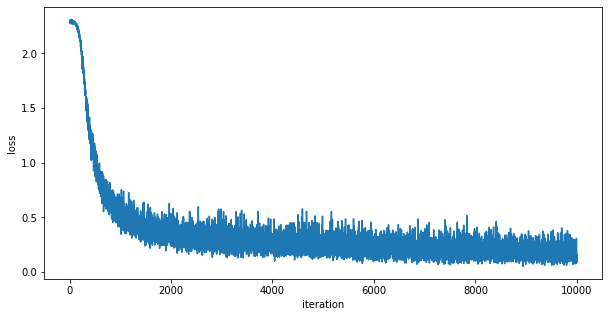

In [36]:
# loss 그래프 그리기
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.pylabtools import figsize

x_loss = np.arange(len(train_loss_list))
figsize(10, 5)
plt.plot(x_loss, train_loss_list)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()

### 4.5.3 시험 데이터로 평가하기

학습 회수가 늘어가면서 손실 함수의 값이 서서히 내려간다. **신경망의 학습은 되고 있는** 것은 확인할 수 있지만 **얼마나 잘 하고 있는지**, 특히 훈련에 참여하지 않는 데이터에 대한 직접적인 **정확도**는 알 수 없다. 따라서 다음과 같이 **시험 데이터**에 대한 직접적인 성능평가를 추가하였다.

In [37]:
import numpy as np
from dataset.mnist import load_mnist
import time
start = time.time()

(x_train, t_train), (x_test, t_test) = \
load_mnist(normalize=True, one_hot_label=True)

# 하이퍼파라미터
iters_num = 10000 # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100  # 미니배치 크기
learning_rate = 0.1

# 저장할 리스트 정의
train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1 에폭당 반복 수
iter_per_epoch = int(train_size / batch_size)   # train_size // batch_size

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

##########################################################################
# 코드를 간단히 하기 위하여 함수로 batch learning step을 정의하였다.
# 위에 정의된 변수들을 대부분 사용하기 때문에 따로 전달할 필요가 없다.
def minibatch_step(network, step, iter_per_epoch):
    # Mini-Batch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.gradient(x_batch, t_batch)
    # {'W1': 784x100, 'b1': 100, 'W2': 100x10, 'b2':10}
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 과정 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1 epoch 당 정확도 계산
    if (step+1) % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("Step {:04d}: Train Acc {:.5f}, Test Acc {:.5f}, {:.2f} sec".\
              format(step+1, train_acc, test_acc, time.time()-start))
##########################################################################
        
for step in range(iters_num):
    minibatch_step(network, step, iter_per_epoch)

print("Done in {} steps: Train Acc {:.5f}, Test Acc {:.5f}, {:.2f} sec".\
      format(iters_num, train_acc_list[-1], test_acc_list[-1], time.time()-start))                

Step 0600: Train Acc 0.78050, Test Acc 0.78560, 2.03 sec
Step 1200: Train Acc 0.87647, Test Acc 0.88120, 4.29 sec
Step 1800: Train Acc 0.89633, Test Acc 0.90040, 6.22 sec
Step 2400: Train Acc 0.90723, Test Acc 0.91030, 8.28 sec
Step 3000: Train Acc 0.91392, Test Acc 0.91480, 10.34 sec
Step 3600: Train Acc 0.91917, Test Acc 0.91990, 12.36 sec
Step 4200: Train Acc 0.92343, Test Acc 0.92370, 14.56 sec
Step 4800: Train Acc 0.92660, Test Acc 0.92740, 16.66 sec
Step 5400: Train Acc 0.93028, Test Acc 0.93050, 18.82 sec
Step 6000: Train Acc 0.93285, Test Acc 0.93230, 20.70 sec
Step 6600: Train Acc 0.93613, Test Acc 0.93550, 22.78 sec
Step 7200: Train Acc 0.93772, Test Acc 0.93680, 25.22 sec
Step 7800: Train Acc 0.94035, Test Acc 0.93930, 27.68 sec
Step 8400: Train Acc 0.94208, Test Acc 0.94100, 29.62 sec
Step 9000: Train Acc 0.94443, Test Acc 0.94310, 31.90 sec
Step 9600: Train Acc 0.94588, Test Acc 0.94310, 33.92 sec
Done in 10000 steps: Train Acc 0.94588, Test Acc 0.94310, 35.01 sec


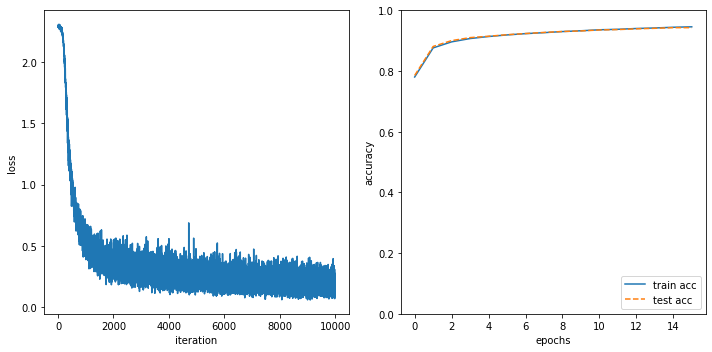

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

figsize(10, 5)
markers = {'train': 'o', 'test': 's'}
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

x_loss = np.arange(len(train_loss_list))
ax1.plot(x_loss, train_loss_list)
ax1.set_xlabel("iteration")
ax1.set_ylabel("loss")

x_acc = np.arange(len(train_acc_list))
ax2.plot(x_acc, train_acc_list, label='train acc')
ax2.plot(x_acc, test_acc_list, label='test acc', linestyle='--')
ax2.set_xlabel("epochs")
ax2.set_ylabel("accuracy")
ax2.set_ylim(0, 1.0)
ax2.legend(loc='lower right')
plt.tight_layout()
plt.show()

**Optional Run** numerical gradient의 실행시간을 비교하여 보자. 매우 매우 매우 오래 걸린다.

In [39]:
# 데이터를 1/100로 줄이고 (60000 -> 600)
# iteration 수도 10000 -> 30으로 줄인다.

train_size = x_train.shape[0] // 100 
(x_train, t_train) = (x_train[:train_size], t_train[:train_size])

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10, grad_comp_mode='numerical')
for step in range(30):  
    minibatch_step(network, step, 1)
    
print("numerical gradient done in {} steps: Train Acc {:.5f}, Test Acc {:.5f}, {:.2f} sec".\
      format(iters_num, train_acc_list[-1], test_acc_list[-1], time.time()-start))                

Step 0001: Train Acc 0.10833, Test Acc 0.10090, 64.12 sec
Step 0002: Train Acc 0.13167, Test Acc 0.11350, 92.40 sec
Step 0003: Train Acc 0.13167, Test Acc 0.11350, 121.04 sec
Step 0004: Train Acc 0.10667, Test Acc 0.10320, 149.65 sec
Step 0005: Train Acc 0.13167, Test Acc 0.11350, 177.95 sec
Step 0006: Train Acc 0.13167, Test Acc 0.11350, 206.31 sec
Step 0007: Train Acc 0.13167, Test Acc 0.11350, 234.69 sec
Step 0008: Train Acc 0.13167, Test Acc 0.11350, 263.21 sec
Step 0009: Train Acc 0.13167, Test Acc 0.11350, 292.07 sec
Step 0010: Train Acc 0.13167, Test Acc 0.11350, 320.41 sec
Step 0011: Train Acc 0.13167, Test Acc 0.11350, 348.84 sec
Step 0012: Train Acc 0.13167, Test Acc 0.11350, 377.04 sec
Step 0013: Train Acc 0.13167, Test Acc 0.11350, 405.78 sec
Step 0014: Train Acc 0.13167, Test Acc 0.11350, 434.41 sec
Step 0015: Train Acc 0.13167, Test Acc 0.11350, 463.04 sec
Step 0016: Train Acc 0.13167, Test Acc 0.11350, 491.60 sec
Step 0017: Train Acc 0.13167, Test Acc 0.11350, 520.16 sec

## 4.6 정리


- 기계학습에서 사용하는 데이터셋은 훈련 데이터와 시험 데이터로 나눠 사용한다.
- 훈련 데이터에서 학습한 모델의 범용 능력을 시험 데이터로 평가한다.
- 신경망 학습은 손실 함수를 지표로, 손실 함수의 값이 작아지는 방향으로 가중치 매개변수를 갱신한다. 가중치 매개변수를 갱신할 때는 가중치 매개변수의 기울기를 이용하고, 기울어진 방향으로 가중치의 값을 갱신하는 작업을 반복한다.
- 아주 작은 값을 주었을 때의 차분으로 미분을 구하는 것을 수치 미분이라고 한다.
- 수치 미분을 이용해 가중치 매개변수의 기울기를 구할 수 있다.